In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print('Columns with missing values: ' )
print(missing_values)

Columns with missing values: 
full_name              0
registered_year       54
engine_capacity        9
insurance              5
transmission_type      0
kms_driven             3
owner_type            36
fuel_type              0
max_power             89
seats                  7
mileage              407
body_type              0
city                   0
resale_price_Lakh      0
dtype: int64


In [8]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print('Columns with duplicate values: ')
print(duplicate_rows)

Columns with duplicate values: 
                                        full_name registered_year  \
1242             2022 Maruti Eeco CNG 5 Seater AC            2022   
1778                     2019 Jaguar XE Portfolio            2019   
2250                   2010 Hyundai i10 Magna 1.1            2010   
2265                        2011 BMW X1 sDrive20d            2011   
3028                  2016 Honda Mobilio V i-DTEC            2016   
...                                           ...             ...   
13736  2010 Volkswagen Polo Diesel Trendline 1.2L            2010   
13742   2015 Ford Ecosport 1.5 Ti VCT AT Titanium            2015   
13787                 2015 Volkswagen Polo GT TSI            2015   
13877            2020 Hyundai i20 Magna Plus BSIV            2020   
13889                     2017 Mahindra XUV500 W4            2017   

      engine_capacity              insurance transmission_type kms_driven  \
1242            1196   Third Party insurance            Manual

In [5]:
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI


In [9]:
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remover vírgula e espaço em branco da coluna 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

In [10]:
# Change the data types of multiple columns
df = df.astype({
    'full_name': 'string',
    'engine_capacity': float,
    'insurance': 'string',
    'transmission_type': 'string',
    'kms_driven': float,
    'owner_type': 'string',
    'fuel_type': 'string',
    'max_power': 'string',
    'seats': float,
    'mileage': 'string',
    'body_type': 'string',
    'city': 'string',
    'resale_price_Lakh': float
})



In [8]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name            string[python]
registered_year              object
engine_capacity             float64
insurance            string[python]
transmission_type    string[python]
kms_driven                  float64
owner_type           string[python]
fuel_type            string[python]
max_power            string[python]
seats                       float64
mileage              string[python]
body_type            string[python]
city                 string[python]
resale_price_Lakh           float64
dtype: object


In [15]:
# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

Distinct full names with blank seats:


In [16]:
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print(valores_unicos_fuel_type)

<StringArray>
['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG']
Length: 5, dtype: string


In [ ]:
#CHECK AND CREAT ID ______________________________________________________________

In [25]:
#Check ID_fuel_type

# Sua coluna de tipos de combustível
fuel_types = df['fuel_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero


for fuel_type, value in idf.items():
    print(f'{fuel_type:>15}: {value:>10}')

         Petrol: 0.18667511225498815
         Diesel: 0.500913650476359
            CNG: 1.5383795956654682
       Electric: 2.4457909564400544
            LPG: 2.7830331247584805


In [26]:
#Create fuel_type ID: IDF

fuel_types = df['fuel_type']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de 1 tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

# Criar nova coluna 'idf' no DataFrame
df['id_fuel_type'] = df['fuel_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [52]:

# fuel_type_id = {
#     'Petrol': 0.01,
#     'Diesel': 0.02,
#     'CNG': 0.12,
#     'Electric': 1.02,
#     'LPG': 2.27
# }
# df['fuel_type_id'] = df['fuel_type'].map(fuel_type_id)
# df['fuel_type_id'] = df['fuel_type_id'].astype(float)
# df[['fuel_type', 'fuel_type_id']]

#testar com a abordagem IDF


,fuel_type,fuel_type_id
0,Petrol,0.01
1,Petrol,0.01
2,Petrol,0.01
3,Diesel,0.02
4,Petrol,0.01
...,...,...
13951,Diesel,0.02
13952,Petrol,0.01
13953,Diesel,0.02
13954,Diesel,0.02


In [12]:
# max min mean 
# min_values = df['seats'].min(), df['resale_price_Lakh'].min()
# print("Min value (seats, resale price): ")
# print(min_values)
# max_values = df['seats'].max(), df['resale_price_Lakh'].max()
# print("Max value(seats, resale price): ")
# print(max_values)
# mean_values = df['seats'].mean(), df['resale_price_Lakh'].mean()
# print("Medium value(seats, resale price): ")
# print(mean_values)

Min value (seats, resale price): 
(2.0, 0.28)
Max value(seats, resale price): 
(10.0, 225.0)
Medium value(seats, resale price): 
(5.20213528231585, 8.845202874032676)


In [27]:
#see for the minimum and maximum value of resale what is the fuel_type
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min= df.loc[min_resale_index, 'fuel_type']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max = df.loc[max_resale_index, 'fuel_type']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "fuel_type: ", min)
print("Max price: ", max_resale_price, "fuel_type: ", max)


Min price:  0.28 fuel_type:  Petrol
Max price:  225.0 fuel_type:  Diesel


In [19]:
#see for the minimum and maximum value of resale what is the number of engine_capacity
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_seats = df.loc[min_resale_index, 'engine_capacity']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_seats = df.loc[max_resale_index, 'engine_capacity']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "engine_capacity: ", min_seats)
print("Max price: ", max_resale_price, "engine_capacity: ", max_seats)


Min price:  0.28 engine_capacity:  796.0
Max price:  225.0 engine_capacity:  2925.0


In [19]:
#coluna rafa
#see for the minimum and maximum value of resale what is the number of Kms_driven

# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_seats = df.loc[min_resale_index, 'kms_driven']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_seats = df.loc[max_resale_index, 'kms_driven']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "kms_driven: ", min_seats)
print("Max price: ", max_resale_price, "kms_driven: ", max_seats)

Min price:  0.28 kms_driven:  30000.0
Max price:  225.0 kms_driven:  36000.0


In [ ]:
#CREATE GROUPS_______________________________________________________________________-

In [20]:
# create groups: kms_driven

# defines the groups limit
limites = [0,20000, 60000, 100000, 150000, 180000, float('inf')]  
rotulos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6']

# new column
df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [20]:
# create groups: engine_capacity

# defines the groups limit
limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

# new column'engine_capacity_group' 
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [ ]:
#AVG PRICE _________________________________________________

In [21]:
#on average what is the price based on
average_price_by_seats = df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()
print(average_price_by_seats)

engine_capacity_group
Elétrico           33.018049
até 1000 cc         4.352258
até 2000 cc         8.187028
até 3000 cc        20.232041
até 4000 cc        29.984848
mais de 4000 cc    43.310000
Name: resale_price_Lakh, dtype: float64


C:\Users\letic\AppData\Local\Temp\ipykernel_17636\1749253820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_seats = df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()


In [28]:
#on average what is the price based on fuel_type
average_price_by_fuel = df.groupby('fuel_type')['resale_price_Lakh'].mean()
print(average_price_by_fuel)

fuel_type
CNG          4.843797
Diesel      12.974956
Electric    28.734490
LPG          1.803362
Petrol       6.929750
Name: resale_price_Lakh, dtype: float64


In [24]:
#on average what is the price based on kms_driven
average_price_by_seats = df.groupby('kms_group')['resale_price_Lakh'].mean()
print(average_price_by_seats)

kms_group
Grupo 1    14.625113
Grupo 2     9.810159
Grupo 3     6.825473
Grupo 4     5.718169
Grupo 5     5.257815
Grupo 6     5.290254
Name: resale_price_Lakh, dtype: float64


C:\Users\seari\AppData\Local\Temp\ipykernel_21140\4200223448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_seats = df.groupby('kms_group')['resale_price_Lakh'].mean()


In [ ]:
#FREQUENCY___________________________________________________

In [55]:
# frequency 
frequencia_fueld = df['fuel_type'].value_counts()
print(frequencia_fueld)


fuel_type
Petrol      9079
Diesel      4403
CNG          403
Electric      49
LPG           22
Name: count, dtype: Int64


In [22]:
# frequency of each group 
frequencia_grupos = df['engine_capacity_group'].value_counts()
print(frequencia_grupos)
frequencia_grupos = df['kms_group'].value_counts()
print(frequencia_grupos)

engine_capacity_group
até 2000 cc        10310
até 1000 cc         2263
até 3000 cc         1279
Elétrico              41
até 4000 cc           33
mais de 4000 cc       21
Name: count, dtype: int64


KeyError: 'kms_group'

In [23]:
mode_values = df[["full_name", "registered_year", "engine_capacity", "insurance", "transmission_type", "kms_driven", "owner_type", "fuel_type", "max_power", "seats", "mileage", "body_type", "city", "resale_price_Lakh"]].mode().iloc[0]
print(mode_values)


full_name            2016 Hyundai Grand i10 Sportz
registered_year                               2017
engine_capacity                             1197.0
insurance                    Third Party insurance
transmission_type                           Manual
kms_driven                                120000.0
owner_type                             First Owner
fuel_type                                   Petrol
max_power                                 81.80bhp
seats                                          5.0
mileage                                  18.9 kmpl
body_type                                Hatchback
city                                         Delhi
resale_price_Lakh                              4.5
Name: 0, dtype: object


In [ ]:
# CORRELATION W PRICE _______________________________________________________________

In [34]:
# calculate correlation only between VAR and 'resale_price_Lakh' columns
correlation = df[['seats', 'resale_price_Lakh']].corr()
print(correlation)


                      seats  resale_price_Lakh
seats              1.000000           0.126669
resale_price_Lakh  0.126669           1.000000


In [ ]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

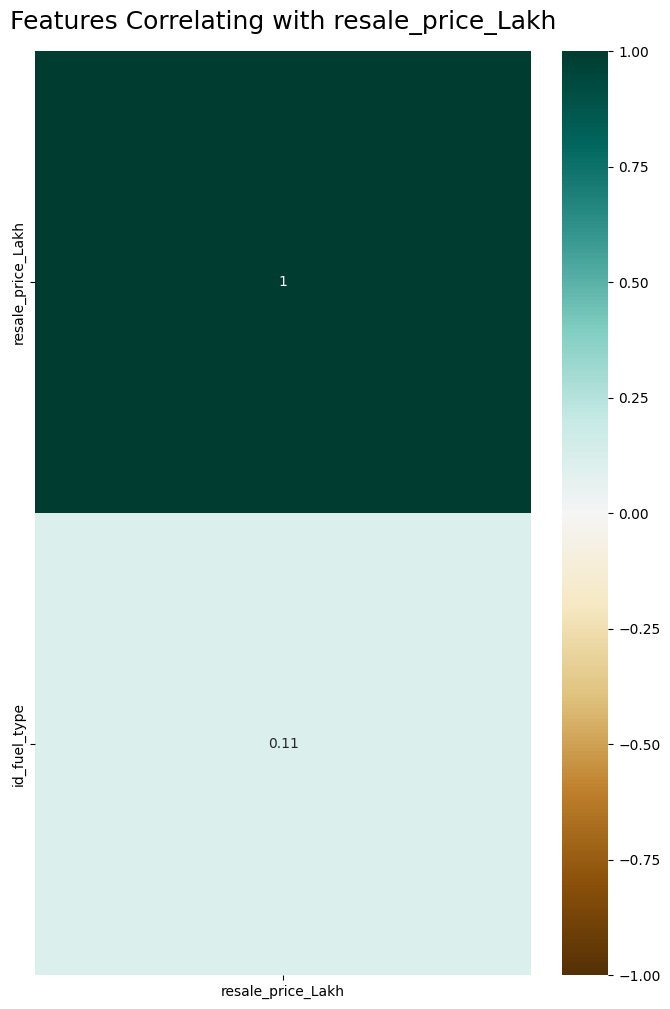

In [29]:
#correlation  with price

# Select columns
columns_of_interest = ['id_fuel_type', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()

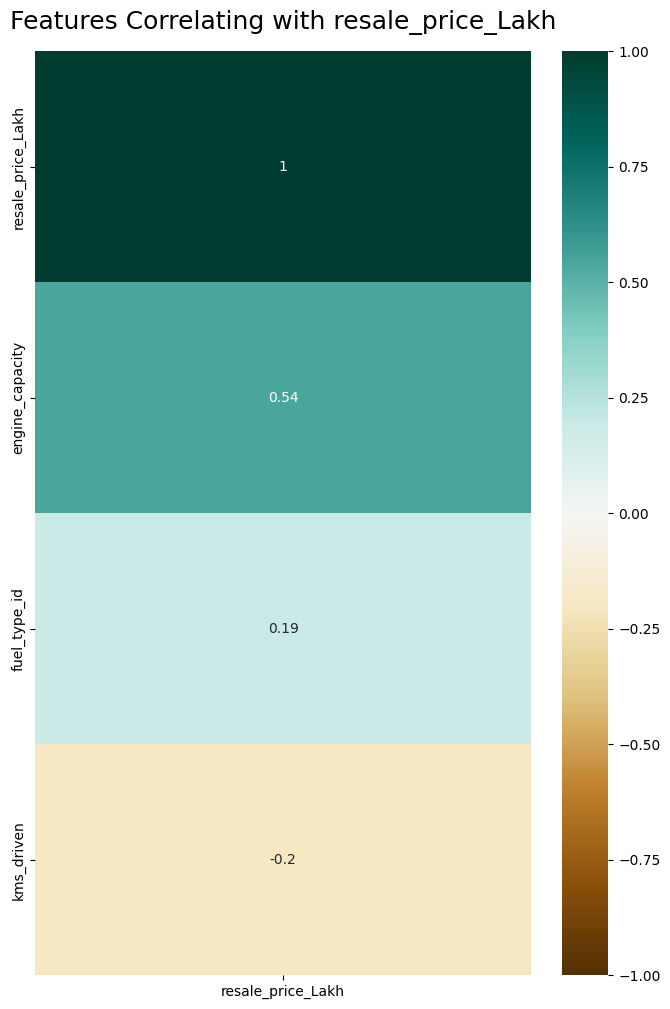

In [44]:
#correlation of all features with price

# Select columns
columns_of_interest = ['fuel_type_id','engine_capacity', 'kms_driven', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()


In [ ]:
# Correlation triangular heatmap
# Select columns
columns_of_interest = ['seats', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(16, 6))

# Set the mask to only display the bottom half of the heatmap
mask = np.triu(np.ones_like(subset_df.corr(), dtype=bool))

# heatmap
heatmap = sns.heatmap(subset_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()

Text(0.5, 1.0, 'Outliers year')

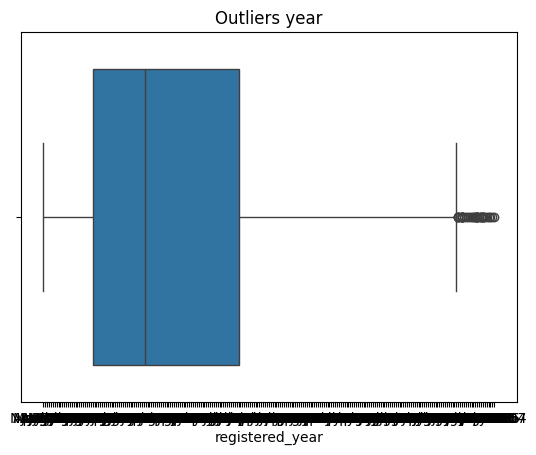

In [33]:
# sns.boxplot(data=df,x=df["registered_year"])
# plt.title("Outliers year")

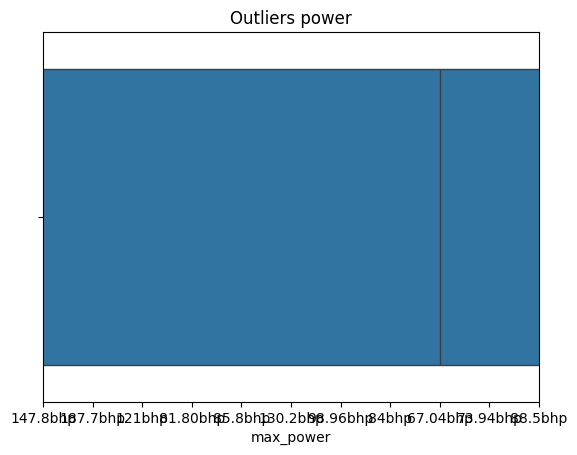

In [ ]:
# Create a box plot for the "max_power" column
# ax = sns.boxplot(data=df, x=df["max_power"])
# plt.title("Outliers power")

# Adjust the x-axis scale
# ax.set(xlim=(60, 70))  # Replace min_value and max_value with your desired limits

# Show the plot
# plt.show()

Text(0.5, 1.0, 'Outliers price')

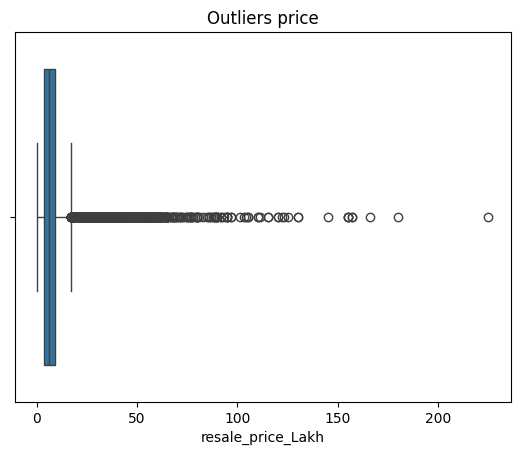

In [ ]:
# sns.boxplot(data=df,x=df["resale_price_Lakh"])
# plt.title("Outliers price")

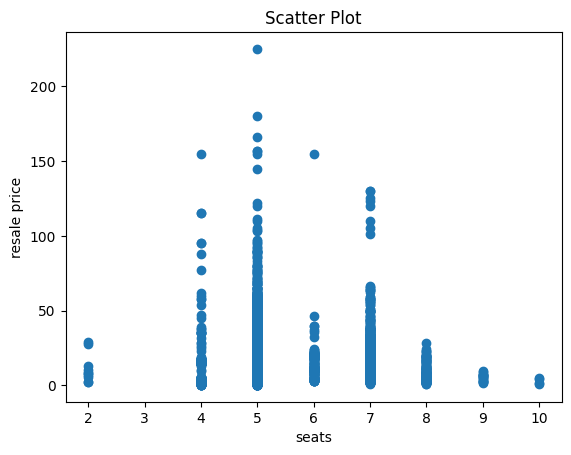

In [37]:
#Create scatter plot
plt.scatter(df['seats'], df['resale_price_Lakh'])
plt.title('Scatter Plot')
plt.xlabel('seats')
plt.ylabel('resale price')
plt.show()